In [1]:
import sys
import os

# Get the absolute path of the parent directory
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add the parent directory to sys.path
sys.path.append(parent_dir)

In [2]:
import pandas as pd
import plotly.express as px
from utilities import read_files
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [3]:
models = ['gemma_2b',
 'qwen2.5_72b',
 'qwen2.5_7b',
 'llama3.2_1b',
 'phi3.5_3.8b',
 'gemma_7b',
 'llama3.1_8b',
 'gemma2_9b',
 'gpt-4-turbo',
 'gemma2_27b',
 'gemma2_2b',
 'codegemma_7b',
 'qwen2.5_32b',
 'llama3.1_70b',
 'llama3.2_3b',
 'codegemma_2b',
 'qwen2.5_3b',
 'mistral_7b',
 'qwen2.5_14b']

In [6]:
files = read_files("scores", False)
files

['scores/codegemma_2b_bleu.pkl',
 'scores/codegemma_2b_rouge_1.pkl',
 'scores/codegemma_2b_rouge_2.pkl',
 'scores/codegemma_2b_rouge_3.pkl',
 'scores/codegemma_7b_bleu.pkl',
 'scores/codegemma_7b_rouge_1.pkl',
 'scores/codegemma_7b_rouge_2.pkl',
 'scores/codegemma_7b_rouge_3.pkl',
 'scores/gemma2_27b_bleu.pkl',
 'scores/gemma2_27b_rouge_1.pkl',
 'scores/gemma2_27b_rouge_2.pkl',
 'scores/gemma2_27b_rouge_3.pkl',
 'scores/gemma2_2b_bleu.pkl',
 'scores/gemma2_2b_rouge_1.pkl',
 'scores/gemma2_2b_rouge_2.pkl',
 'scores/gemma2_2b_rouge_3.pkl',
 'scores/gemma2_9b_bleu.pkl',
 'scores/gemma2_9b_rouge_1.pkl',
 'scores/gemma2_9b_rouge_2.pkl',
 'scores/gemma2_9b_rouge_3.pkl',
 'scores/gemma_2b_bleu.pkl',
 'scores/gemma_2b_rouge_1.pkl',
 'scores/gemma_2b_rouge_2.pkl',
 'scores/gemma_2b_rouge_3.pkl',
 'scores/gemma_7b_bleu.pkl',
 'scores/gemma_7b_rouge_1.pkl',
 'scores/gemma_7b_rouge_2.pkl',
 'scores/gemma_7b_rouge_3.pkl',
 'scores/gpt-4-turbo_bleu.pkl',
 'scores/gpt-4-turbo_rouge_1.pkl',
 'scores/g

In [7]:
df_cluster = pd.DataFrame(columns=["file", "model", "mode", "rouge1", "rouge2", "rouge3", "bleu"])
df_folder = pd.DataFrame(columns=["file", "model", "mode", "rouge1", "rouge2", "rouge3", "bleu"])
for model in models:
    # Get metric files related to the current model
    metrics = [file for file in files if model in file]
    for metric in metrics:
        # Load scores from pickle file
        try:
            scores = pickle.load(open(metric, "rb"))
        except Exception as e:
            print(f"Error loading {metric}: {e}")
            continue
        
        # Extract metric name (e.g., "rouge1", "rouge2", "bleu")
        name = metric.split("_")[-1].split(".")[0]
        if name != "bleu":
            name = "rouge" + name

        # Extract files and values
        files_cluster = [val[0] for val in scores["cluster"]]
        files_folder = [val[0] for val in scores["folder"]]
        
        
        values_cluster = {val[0]: val[1] for val in scores["cluster"]}
        values_folder = {val[0]: val[1] for val in scores["folder"]}

        # Match files with common base names
        for file in files_cluster:
            base_name = file.split("/")[-1].replace("_cluster.txt", ".txt")
            
            folder_file = f"./results/{model}/{base_name.replace('.txt', '_folder.txt')}"
    
            # Check if folder_file exists in files_folder
            if folder_file in values_folder:
                cluster_value = values_cluster[file]
                folder_value = values_folder[folder_file]

                # Update df_cluster
                if df_cluster[(df_cluster["file"] == base_name) & (df_cluster["model"] == model)].empty:
                    df_cluster = pd.concat([df_cluster, pd.DataFrame([{
                        "file": base_name, "model": model, "mode": "cluster", name: cluster_value
                    }])], ignore_index=True)
                else:
                    df_cluster.loc[
                        (df_cluster["file"] == base_name) & (df_cluster["model"] == model), name
                    ] = cluster_value

                # Update df_folder
                if df_folder[(df_folder["file"] == base_name) & (df_folder["model"] == model)].empty:
                    df_folder = pd.concat([df_folder, pd.DataFrame([{
                        "file": base_name, "model": model, "mode": "folder", name: folder_value
                    }])], ignore_index=True)
                else:
                    df_folder.loc[
                        (df_folder["file"] == base_name) & (df_folder["model"] == model), name
                    ] = folder_value

C:\Users\z004x5km\AppData\Local\Temp\ipykernel_16460\4192427866.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_cluster = pd.concat([df_cluster, pd.DataFrame([{
C:\Users\z004x5km\AppData\Local\Temp\ipykernel_16460\4192427866.py:50: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_folder = pd.concat([df_folder, pd.DataFrame([{


In [8]:
df_cluster

,file,model,mode,rouge1,rouge2,rouge3,bleu
0,ParameterTest.txt,gemma_2b,cluster,0.098901,0.0,0.0,0.017176
1,OccurrenceTest.txt,gemma_2b,cluster,0.009174,0.0,0.0,0.001553
2,MassConstraintExample.txt,gemma_2b,cluster,0.009685,0.0,0.0,0.001565
3,HSUVRequirements.txt,gemma_2b,cluster,0.012371,0.0,0.0,0.001899
4,CircularImport.txt,gemma_2b,cluster,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...
1664,CarWithShapeAndCSG.txt,qwen2.5_14b,cluster,0.064171,0.024129,0.008065,0.021990
1665,VehicleRequirementDerivation.txt,qwen2.5_14b,cluster,0.085627,0.024615,0.0,0.017525
1666,AHFSequences.txt,qwen2.5_14b,cluster,0.014423,0.001605,0.001608,0.002595
1667,AnalysisTest.txt,qwen2.5_14b,cluster,0.062112,0.0375,0.006289,0.015886


In [9]:
combined_data = pd.concat([df_cluster, df_folder], ignore_index=True)
combined_data

,file,model,mode,rouge1,rouge2,rouge3,bleu
0,ParameterTest.txt,gemma_2b,cluster,0.098901,0.0,0.0,0.017176
1,OccurrenceTest.txt,gemma_2b,cluster,0.009174,0.0,0.0,0.001553
2,MassConstraintExample.txt,gemma_2b,cluster,0.009685,0.0,0.0,0.001565
3,HSUVRequirements.txt,gemma_2b,cluster,0.012371,0.0,0.0,0.001899
4,CircularImport.txt,gemma_2b,cluster,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...
3333,CarWithShapeAndCSG.txt,qwen2.5_14b,folder,0.145695,0.053156,0.006667,0.050780
3334,VehicleRequirementDerivation.txt,qwen2.5_14b,folder,0.051546,0.005181,0.0,0.008650
3335,AHFSequences.txt,qwen2.5_14b,folder,0.023981,0.004819,0.0,0.002258
3336,AnalysisTest.txt,qwen2.5_14b,folder,0.054711,0.018349,0.0,0.010919


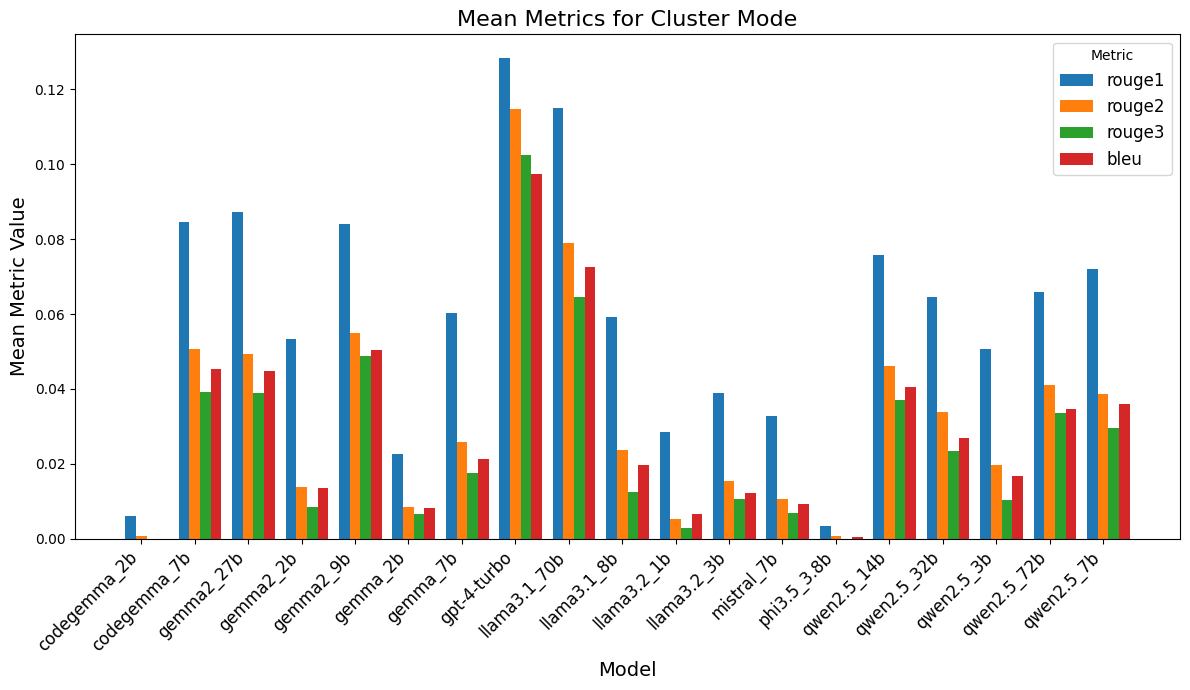

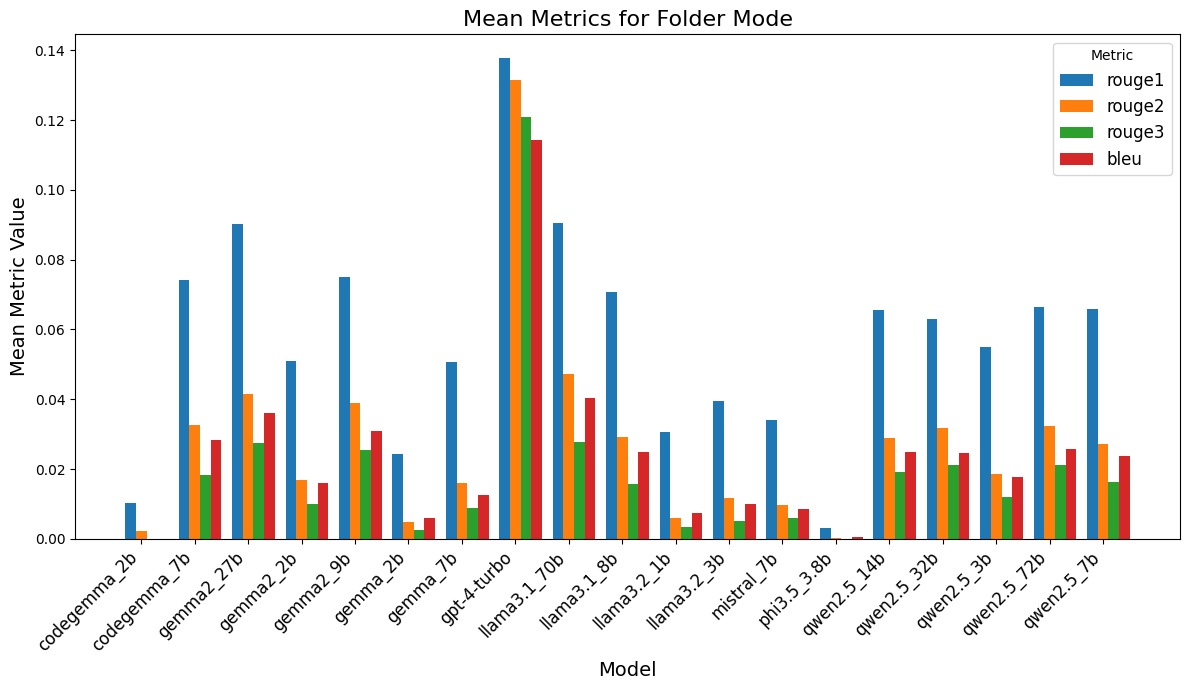

In [10]:
mean_metrics = (
    combined_data
    .groupby(['model', 'mode'])[['rouge1', 'rouge2', 'rouge3', 'bleu']]
    .mean()
    .reset_index()
)

# Plotting
modes = mean_metrics['mode'].unique()
metrics = ['rouge1', 'rouge2', 'rouge3', 'bleu']

# Create a bar plot for each mode
for mode in modes:
    
    # Filter data for the current mode
    mode_data = mean_metrics[mean_metrics['mode'] == mode]
    
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(12, 7))
    
    # Set bar width and positions
    bar_width = 0.2
    bar_positions = range(len(mode_data['model']))
    
    # Plot each metric as a bar
    for i, metric in enumerate(metrics):
        ax.bar(
            [pos + i * bar_width for pos in bar_positions],  # Bar positions
            mode_data[metric],  # Mean values for the metric
            bar_width,          # Width of each bar
            label=metric        # Metric name for the legend
        )
    
    # Customize the plot
    ax.set_title(f"Mean Metrics for {mode.capitalize()} Mode", fontsize=16)
    ax.set_xlabel("Model", fontsize=14)
    ax.set_ylabel("Mean Metric Value", fontsize=14)
    
    # Set x-axis tick positions and labels, with diagonal text
    ax.set_xticks([pos + bar_width for pos in bar_positions])
    ax.set_xticklabels(mode_data['model'], fontsize=12, rotation=45, ha="right")
    
    # Add a legend and adjust layout
    ax.legend(title="Metric", fontsize=12)
    plt.tight_layout()
    
    # Show or save the plot
    plt.show()

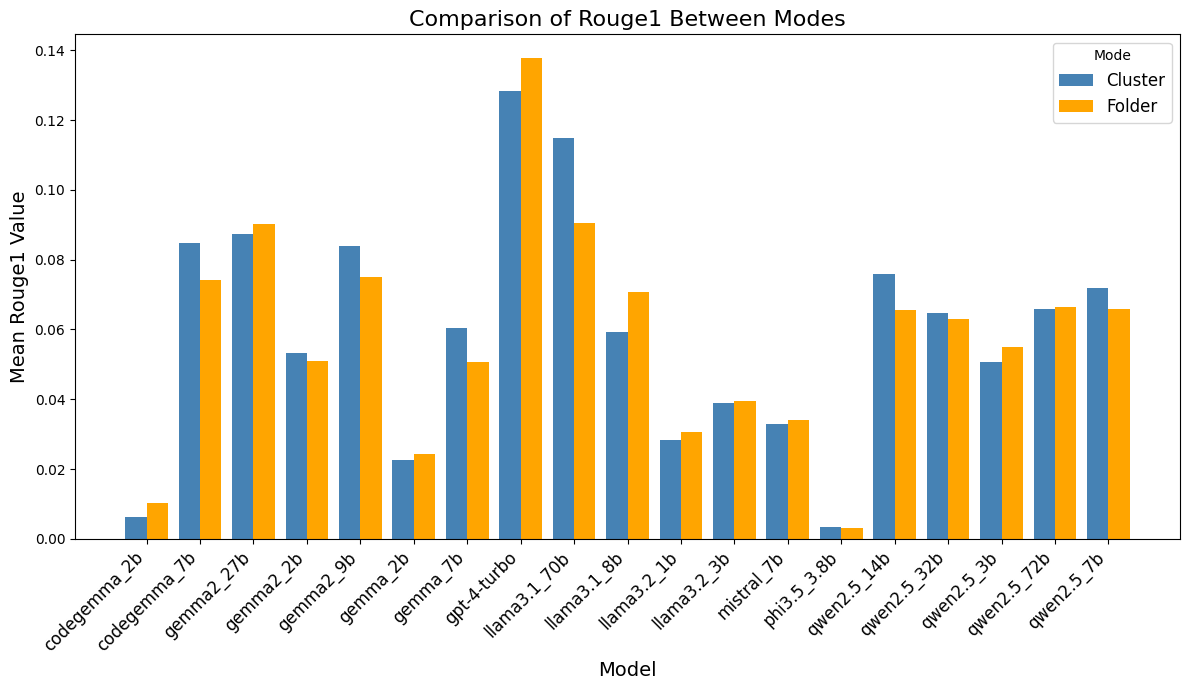

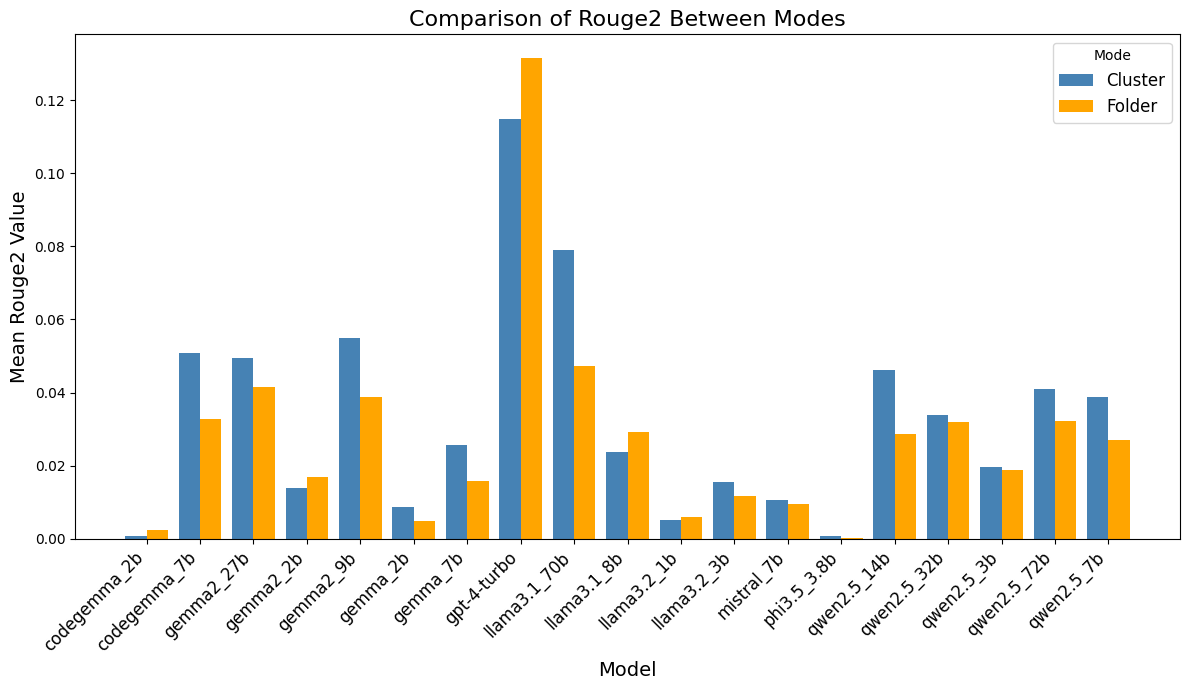

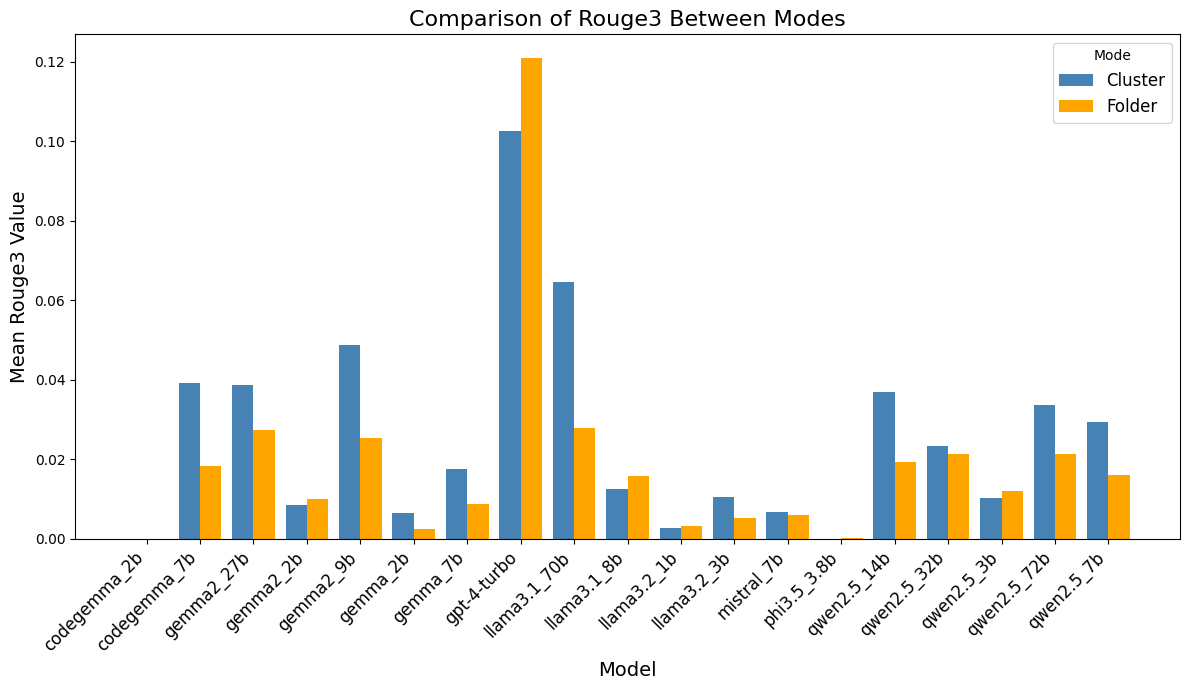

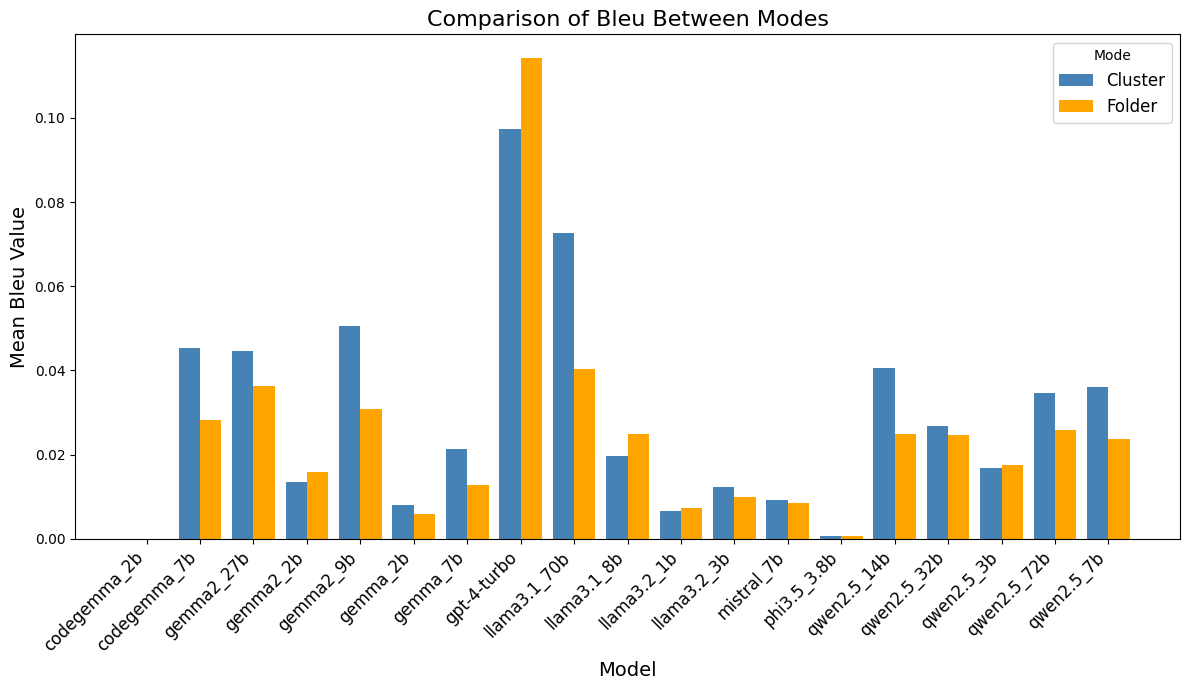

In [11]:
for metric in metrics:
    
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(12, 7))
    
    # Filter the data for plotting
    cluster_data = mean_metrics[mean_metrics['mode'] == 'cluster'][['model', metric]].set_index('model')
    folder_data = mean_metrics[mean_metrics['mode'] == 'folder'][['model', metric]].set_index('model')
    
    # Join the two datasets for comparison
    comparison_data = cluster_data.join(folder_data, lsuffix='_cluster', rsuffix='_folder')
    
    # Bar positions and width
    bar_width = 0.4
    bar_positions = range(len(comparison_data))
    
    # Plot bars for each mode
    ax.bar(
        [pos - bar_width / 2 for pos in bar_positions], 
        comparison_data[f'{metric}_cluster'], 
        bar_width, 
        label='Cluster', 
        color='steelblue'
    )
    ax.bar(
        [pos + bar_width / 2 for pos in bar_positions], 
        comparison_data[f'{metric}_folder'], 
        bar_width, 
        label='Folder', 
        color='orange'
    )
    
    # Customize the plot
    ax.set_title(f"Comparison of {metric.capitalize()} Between Modes", fontsize=16)
    ax.set_xlabel("Model", fontsize=14)
    ax.set_ylabel(f"Mean {metric.capitalize()} Value", fontsize=14)
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(comparison_data.index, fontsize=12, rotation=45, ha="right")
    
    # Add a legend
    ax.legend(title="Mode", fontsize=12)
    plt.tight_layout()
    
    # Show the plot
    plt.show()